In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal

my_orange = '#e56d1d'
my_grey = '#363636ff'
fs = 128

Text(0, 0.5, 'Angular Velocity (rad/s)')

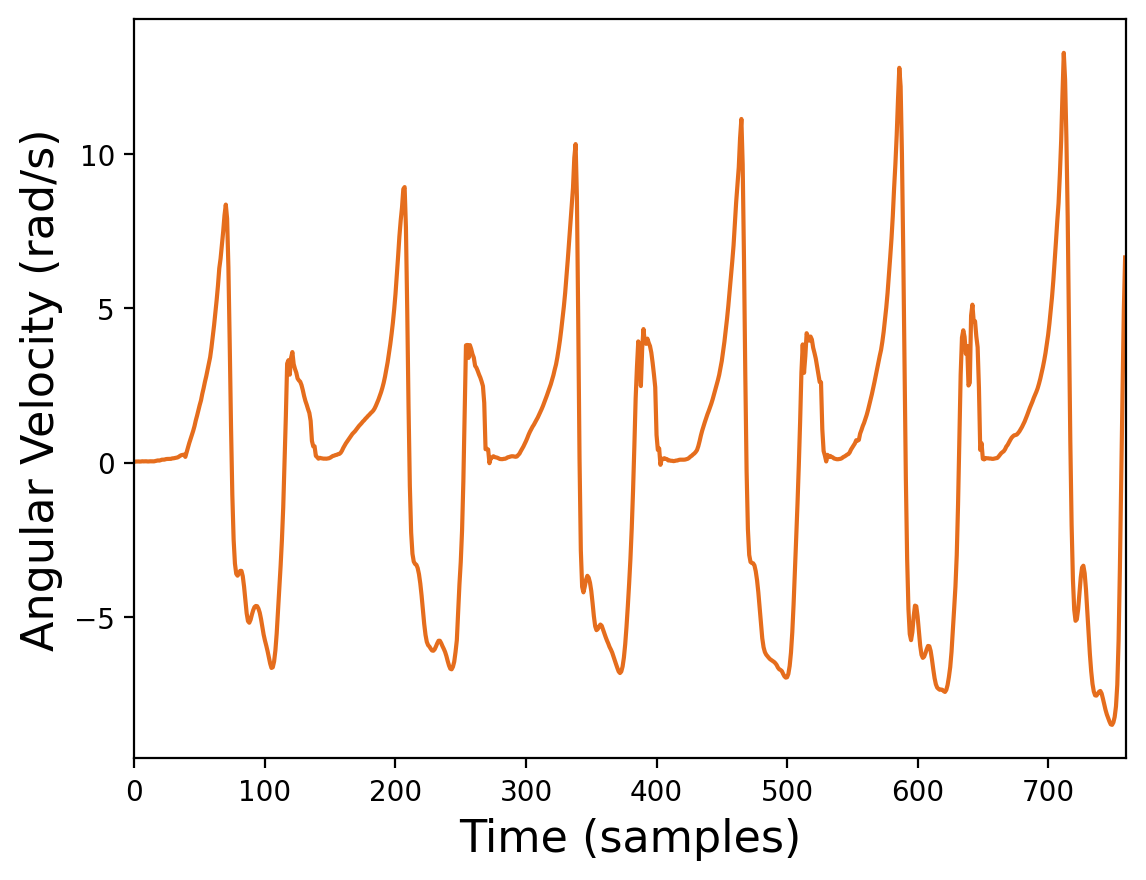

In [2]:
# Read the csv data, convert it as an array, remove useless dimension
x = pd.read_csv('./data/ITW_gML.csv').to_numpy().squeeze()

f = plt.figure(dpi = 200)
plt.plot(x, color=my_orange)
plt.xlim([0, x.shape[0]])
plt.xlabel('Time (samples)', fontsize=16)
plt.ylabel('Angular Velocity (rad/s)', fontsize=16)

#plt.savefig('FC_1.svg')

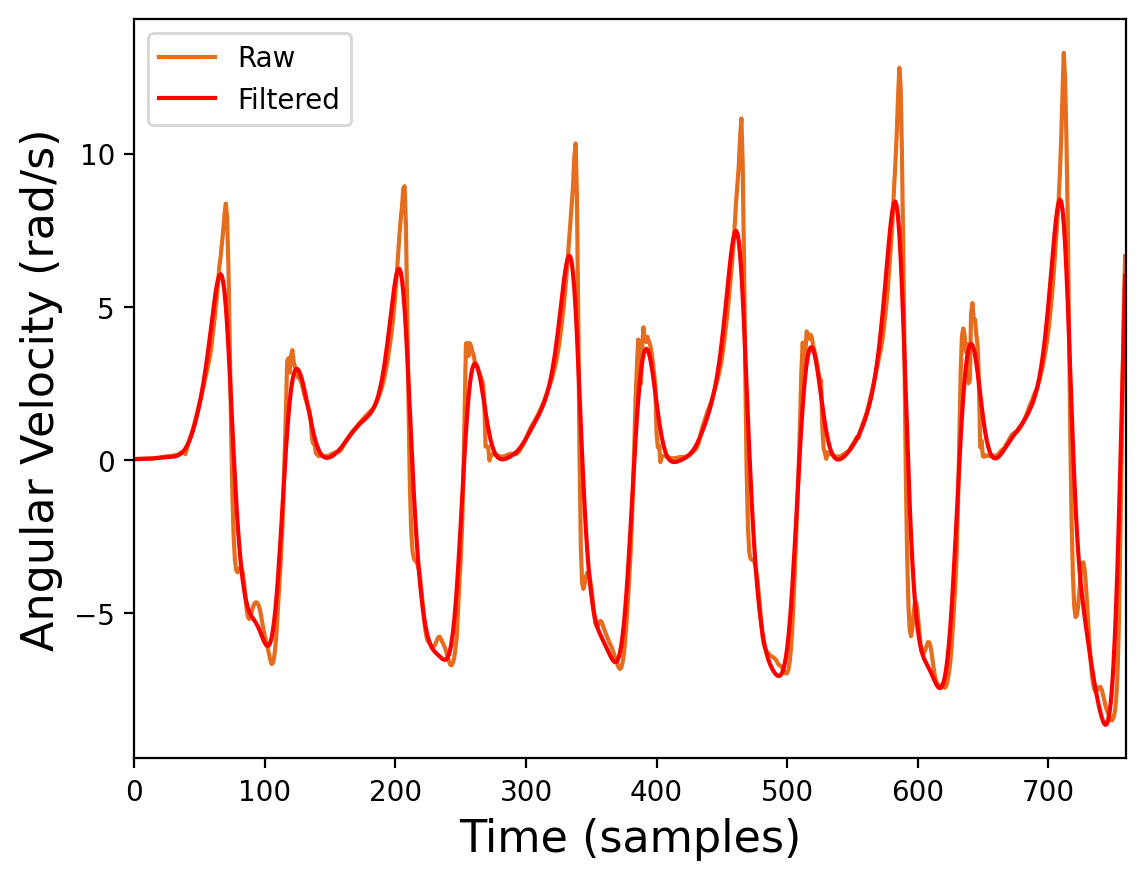

In [3]:
# Filter the reversed signal in order to find the peaks that roughly correspond to the mid-swing phase of the gait cycle. 
b, a = signal.butter(N=2, Wn=5/(fs * .5), btype='low')
gML = signal.filtfilt(b, a, x)

f = plt.figure(dpi=200)
plt.plot(x, color=my_orange)
plt.plot(gML, color='red')
plt.xlim([0, x.shape[0]])
plt.xlabel('Time (samples)', fontsize=16)
plt.ylabel('Angular Velocity (rad/s)', fontsize=16)
plt.legend(['Raw','Filtered'])

#plt.savefig('FC_2.svg')

Text(0, 0.5, 'Angular Velocity (rad/s)')

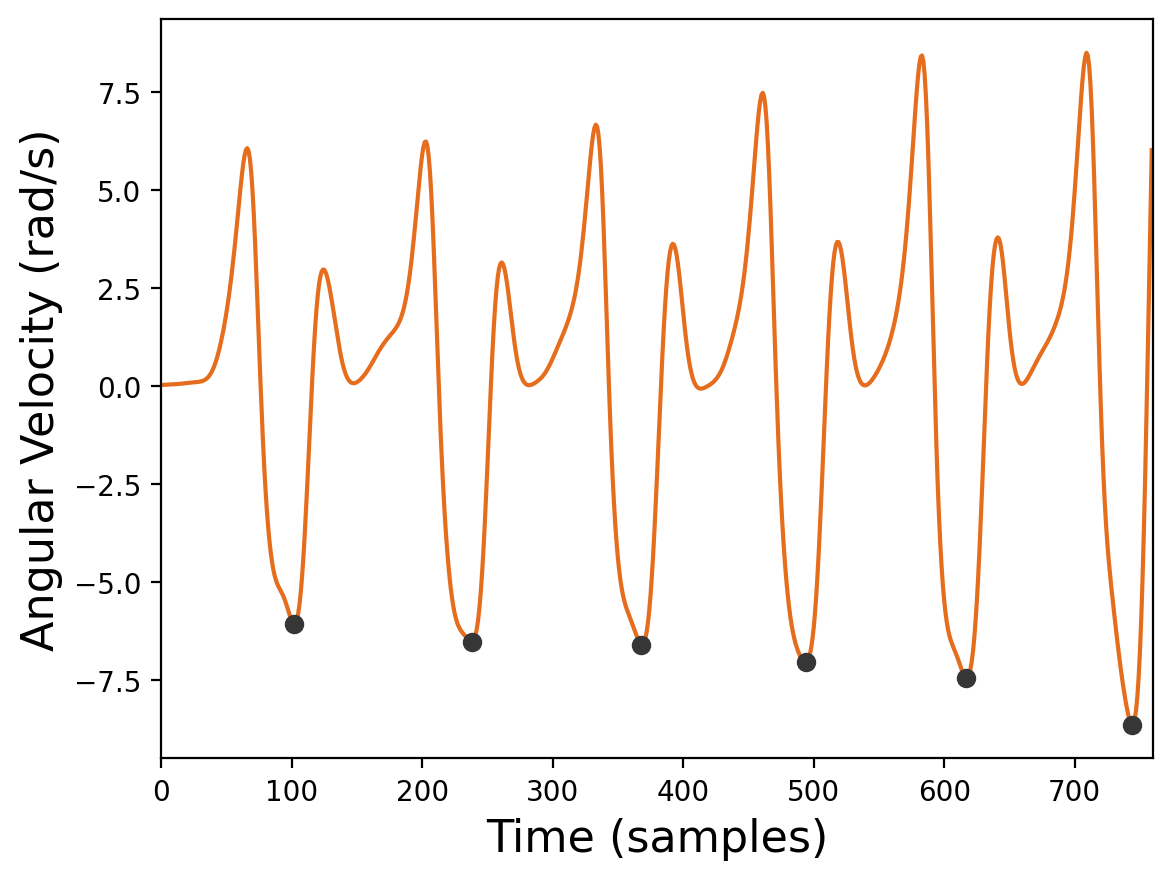

In [4]:
peaks, _ = signal.find_peaks(-gML, height=np.std(gML), distance=fs * .5)

f = plt.figure(dpi=200)
plt.plot(gML, color=my_orange)
plt.plot(peaks, gML[peaks], marker='o', color=my_grey, linestyle='none')

plt.xlim([0, x.shape[0]])
plt.xlabel('Time (samples)', fontsize=16)
plt.ylabel('Angular Velocity (rad/s)', fontsize=16)

#plt.savefig('FC_3.svg')

In [69]:
# Insert a fake mid-swing peak to comply array dimensions
locs = np.insert(peaks, peaks.shape[0], x.shape[0])

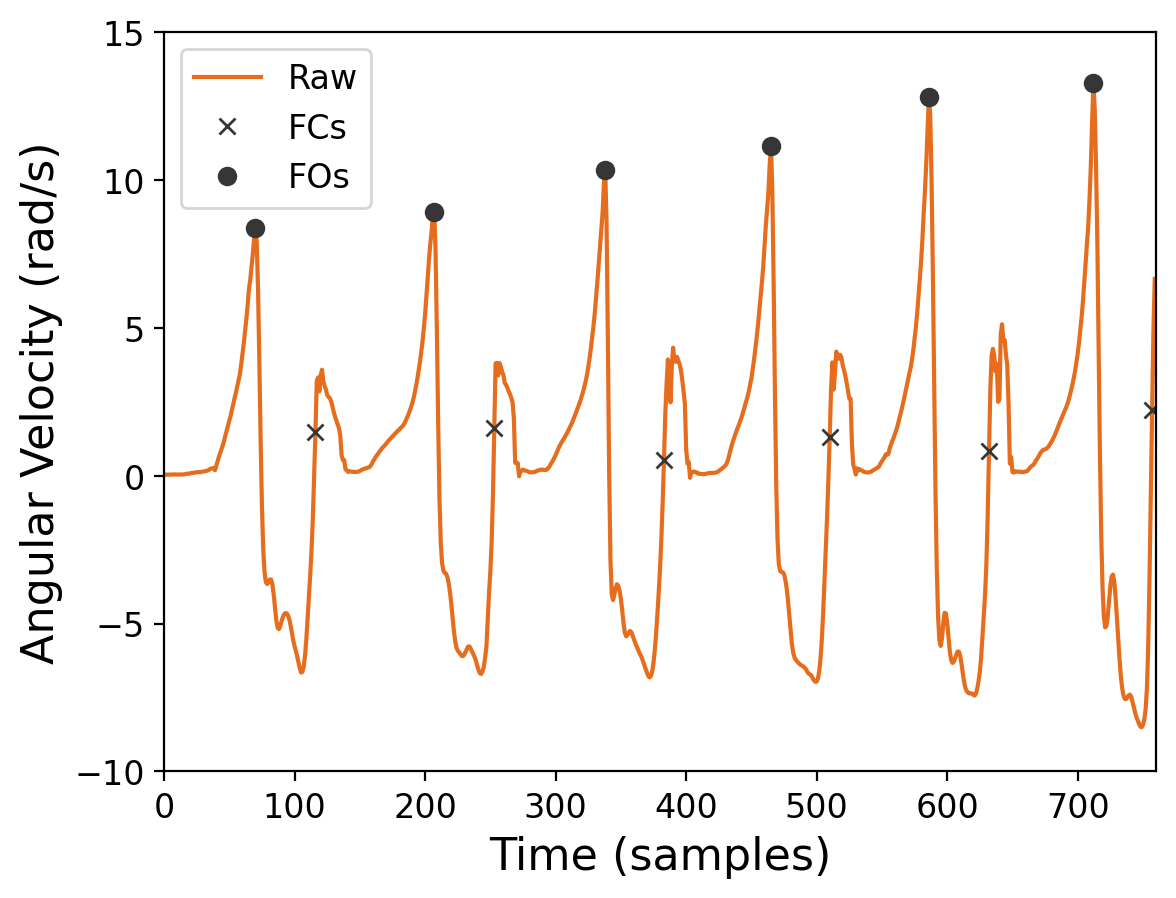

In [112]:
FC, FO = [], []

for i in range(0, locs.shape[0]):
    for k in range(locs[i-1], locs[i]):
        if (x[k] * x[k-1] < 0) and x[k] > 0:
            FC.append(k)
            break

# Insert fake 0 and end peak to comply for array dimensions
locs = np.insert(peaks, 0, 0)
locs = np.insert(locs, locs.shape[0], x.shape[0]-2)

for i in range(0, locs.shape[0]):
    for k in range(locs[i], locs[i-1], -1):
        if (x[k] > x[k-1]) and (x[k] > x[k+1]) and (x[k] > np.std(x)):
            FO.append(k)
            break
                                    

f = plt.figure(dpi = 200)
plt.plot(x, color=my_orange)
plt.plot(FC, x[FC], marker='x', color=my_grey, linestyle='none')
plt.plot(FO, x[FO], marker='o', color=my_grey, linestyle='none')

plt.xlim([0, x.shape[0]])
plt.xlabel('Time (samples)', fontsize=16)
plt.ylabel('Angular Velocity (rad/s)', fontsize=16)
plt.ylim([-10,15])
plt.legend(['Raw','FCs', 'FOs'], loc='upper left')

plt.savefig('FC_04.svg')